In [2]:
import os
import math
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer, Normalizer, StandardScaler
from sklearn.externals import joblib

In [3]:
os.getcwd()

'/Users/dominikpeter/Homework/mining/Uebung2'

In [4]:
x = [x for x in os.walk('/Users/dominikpeter/Homework/mining/HMP_Dataset')]

In [5]:
subfolder = x[0][1]
subfolder[0:5]

['Brush_teeth',
 'Climb_stairs',
 'Climb_stairs_MODEL',
 'Comb_hair',
 'Descend_stairs']

In [6]:
folders = []
[folders.append('/Users/dominikpeter/Homework/mining/HMP_Dataset' + '/' + word) for word in subfolder]
folders[0:5]

['/Users/dominikpeter/Homework/mining/HMP_Dataset/Brush_teeth',
 '/Users/dominikpeter/Homework/mining/HMP_Dataset/Climb_stairs',
 '/Users/dominikpeter/Homework/mining/HMP_Dataset/Climb_stairs_MODEL',
 '/Users/dominikpeter/Homework/mining/HMP_Dataset/Comb_hair',
 '/Users/dominikpeter/Homework/mining/HMP_Dataset/Descend_stairs']

In [7]:
files = []
for folder in folders:
    [files.append(folder + '/' + f) for f in os.listdir(folder) if f.endswith(".txt")]
files[0:5]

['/Users/dominikpeter/Homework/mining/HMP_Dataset/Brush_teeth/Accelerometer-2011-04-11-13-28-18-brush_teeth-f1.txt',
 '/Users/dominikpeter/Homework/mining/HMP_Dataset/Brush_teeth/Accelerometer-2011-04-11-13-29-54-brush_teeth-f1.txt',
 '/Users/dominikpeter/Homework/mining/HMP_Dataset/Brush_teeth/Accelerometer-2011-05-30-08-35-11-brush_teeth-f1.txt',
 '/Users/dominikpeter/Homework/mining/HMP_Dataset/Brush_teeth/Accelerometer-2011-05-30-09-36-50-brush_teeth-f1.txt',
 '/Users/dominikpeter/Homework/mining/HMP_Dataset/Brush_teeth/Accelerometer-2011-05-30-10-34-16-brush_teeth-m1.txt']

In [8]:
df = []
for file in files:
    new_df = pd.read_csv(file, sep = ' ', header=None, names = ['x', 'y', 'z'])
    new_df['label'] = re.search('-\w+-', file[::-1]).group(0)[::-1].replace('-', '')
    df.append(new_df)
df = pd.concat(df, axis=0)
df.head()

,x,y,z,label
0,22,49,35,brush_teeth
1,22,49,35,brush_teeth
2,22,52,35,brush_teeth
3,22,52,35,brush_teeth
4,21,52,34,brush_teeth


In [63]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [64]:
from sklearn.decomposition import PCA

In [65]:
X = df.sample(5000).iloc[:, [0,1,2]]

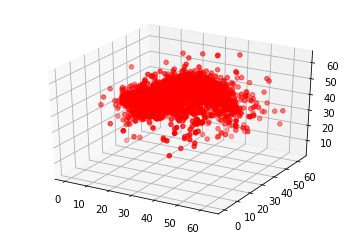

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X.x
y = X.y
z = X.z
ax.scatter(x, y, z, c='r', marker='o')
plt.show()

In [68]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [69]:
X1 = X_pca[:,0]
X2 = X_pca[:,1]

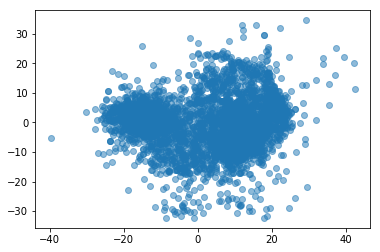

In [70]:
plt.scatter(X1, X2, alpha=0.5)
plt.show()